In [1]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [18]:
def PlotStuff(x, y, model, epoch, leg = True):
    plt.plot(x.numpy(), model(x).detach().numpy(), label = ('epoch ' + str(epoch)))
    plt.plot(x.numpy(), y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [3]:
class Net(nn.Module): 
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [11]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [12]:
x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
y = torch.zeros(x.shape[0])
y[(x[:, 0] > -4) & (x[:, 0] < 4)] = 1.0

In [13]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [14]:
input_l = 1
hidden_l = 2
output_l = 1
learning_rate = 0.1
model = Net(input_l, hidden_l, output_l)

In [15]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.7929],
                      [-0.0887]])),
             ('linear1.bias', tensor([ 0.2646, -0.3022])),
             ('linear2.weight', tensor([[-0.1390, -0.6755]])),
             ('linear2.bias', tensor([-0.4683]))])

In [16]:
model.state_dict()['linear1.weight'][0]=1.0
model.state_dict()['linear1.weight'][1]=1.0
model.state_dict()['linear1.bias'][0]=0.0
model.state_dict()['linear1.bias'][1]=0.0
model.state_dict()['linear2.weight'][0]=1.0
model.state_dict()['linear2.bias'][0]=0.0
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.],
                      [1.]])),
             ('linear1.bias', tensor([0., 0.])),
             ('linear2.weight', tensor([[1., 1.]])),
             ('linear2.bias', tensor([0.]))])

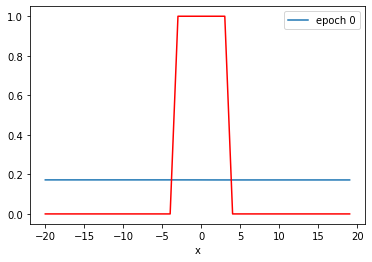

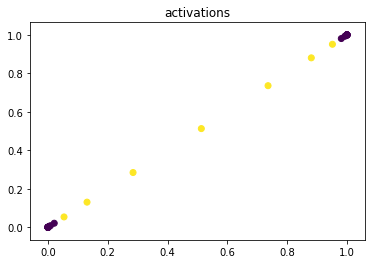

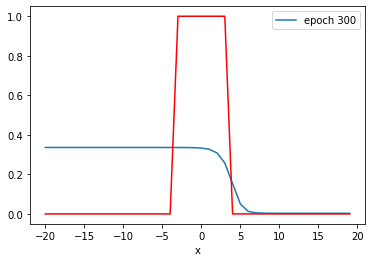

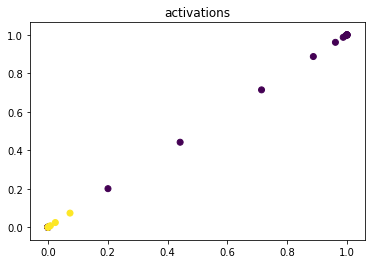

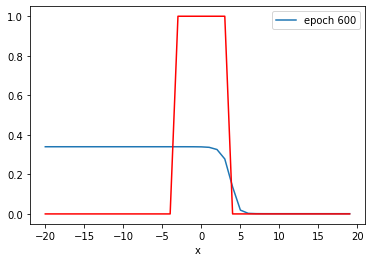

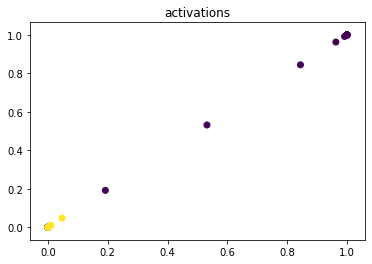

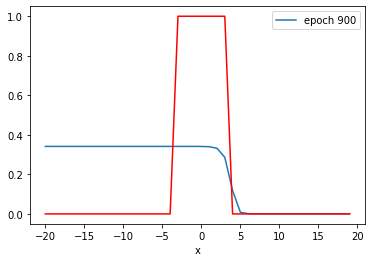

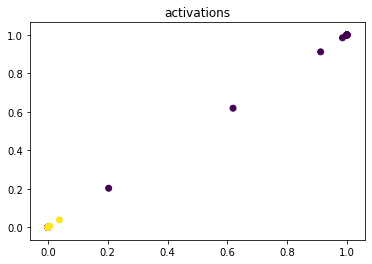

Text(0.5, 1.0, 'cross entropy loss')

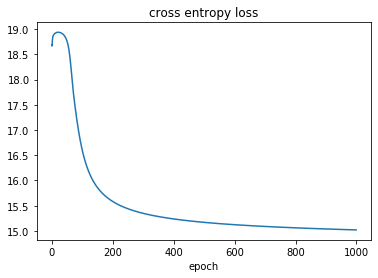

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cost_cross = train(y, x, model, optimizer, criterion_cross, epochs = 1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [20]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[1.9348],
                      [1.9348]])),
             ('linear1.bias', tensor([-9.0754, -9.0754])),
             ('linear2.weight', tensor([[-3.3982, -3.3982]])),
             ('linear2.bias', tensor([-0.6546]))])

In [21]:
y_hat = model(torch.tensor([[-2.0], [0.0], [2.0]]))
y_hat

tensor([[0.3420],
        [0.3418],
        [0.3337]], grad_fn=<SigmoidBackward>)

In [22]:
input_l = 1
hidden_l = 2
output_l = 1

learning_rate = 0.1
model = Net(input_l, hidden_l, output_l)

C:\Source-Files\anaconda3\envs\panthera_uncia\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


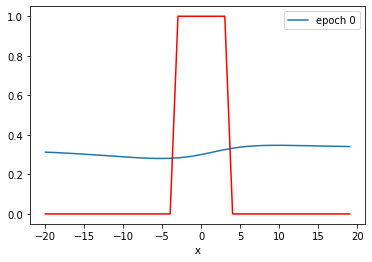

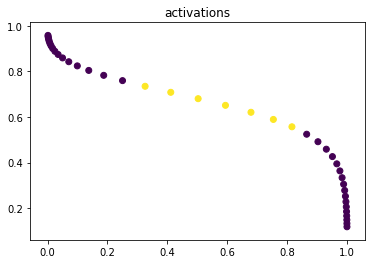

C:\Source-Files\anaconda3\envs\panthera_uncia\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


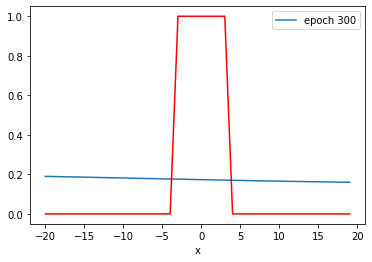

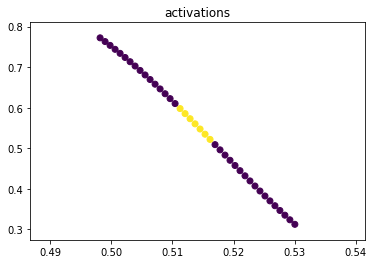

C:\Source-Files\anaconda3\envs\panthera_uncia\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


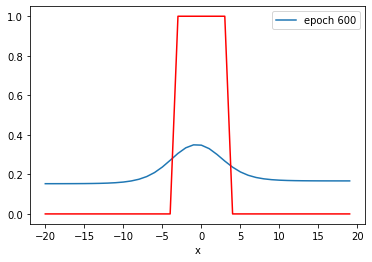

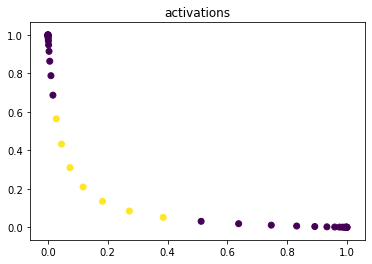

C:\Source-Files\anaconda3\envs\panthera_uncia\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


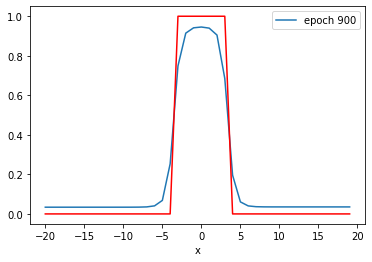

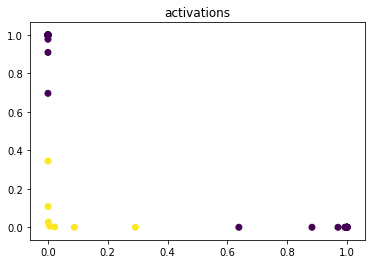

C:\Source-Files\anaconda3\envs\panthera_uncia\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0.5, 1.0, 'cross entropy lost')

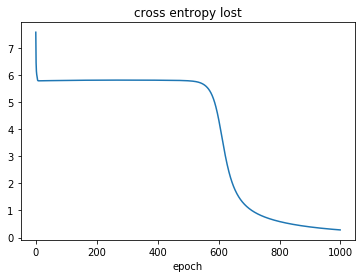

In [25]:
criterion_cross = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cost_cross = train(y, x, model, optimizer, criterion_cross, epochs = 1000)
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy lost')